## 0. Abstract & reminder

**Import libraries**

In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Viewing dataset**

In [2]:
%time df = pd.read_csv(r"D:\Nhan\Data\XTX_data.csv")

print(df.shape)
df.head(10)

Wall time: 22.2 s
(2999999, 61)


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


Our dataset has about 3 million data-points with 60 features divided into 4 groups `bid / ask & size/rate`, so what they meant?

### Quick reminder

- The term bid and ask (also known as bid and offer) refers to a two-way price quotation that indicates the best potential price at which a security can be sold and bought at a given point in time. 

- A trade or transaction occurs after the buyer and seller agree on a price for the security which is no higher than the bid and no lower than the ask.

The difference between bid and ask prices, or the spread, is a key indicator of the liquidity of the asset. In general, the smaller the spread, the better the liquidity.

> **`askRate`** or `askPrice` : represents the minimum price that a `seller` is willing to take for that same security.
>
> **`bidRate`** or `bidPrice`: represents the maximum price that a `buyer` is willing to pay for a share of stock or other security.
>
> The numbers following the `bidPrice` and `askPrices`, and these are the `number of shares available to trade` at those respective prices, called **`bidSize`** and **`askSize`**


Reference:
- https://investinganswers.com/dictionary/b/bid-size
- https://www.investopedia.com/ask/answers/06/bidasknumbers.asp
- https://www.investopedia.com/terms/b/bid-and-ask.asp#:~:text=The%20bid%20price%20refers%20to,liquidity%20of%20the%20given%20security.


## 1. Missing value 's statistic

In [3]:
x_na = df.iloc[0, 3]
print(x_na, '\n', type(x_na))

nan 
 <class 'numpy.float64'>


**Count the features with the `NaN` value in dataset (not including the target)**

In [4]:
na_df = df.dropna()
na_df_count = df.shape[0] - df.iloc[:, :-1][~(df.iloc[:, :-1] == x_na)].count()
print('For all features, there are %s missing values in the whole dataframe'%(df.shape[0] - na_df.shape[0]))

print('For each feature in this dataset: ')

print('- The column that has the most missing_values is %s and there are %s NAN_values'%
      (na_df_count[na_df_count != 0].idxmax(), na_df_count[na_df_count != 0].max()))

print('- The column that has the least number of missing_values is %s and there are %s NAN_values'%
      (na_df_count[na_df_count != 0].idxmin(), na_df_count[na_df_count != 0].min()))

print('- Detailed of missing values at each features (which exists NAN_values):')
na_df_count[na_df_count != 0]

For all features, there are 451 missing values in the whole dataframe
For each feature in this dataset: 
- The column that has the most missing_values is askRate14 and there are 451 NAN_values
- The column that has the least number of missing_values is askRate1 and there are 36 NAN_values
- Detailed of missing values at each features (which exists NAN_values):


askRate1      36
askRate2      64
askRate3      97
askRate4     138
askRate5     173
askRate6     207
askRate7     238
askRate8     265
askRate9     291
askRate10    325
askRate11    360
askRate12    394
askRate13    429
askRate14    451
askSize1      36
askSize2      64
askSize3      97
askSize4     138
askSize5     173
askSize6     207
askSize7     238
askSize8     265
askSize9     291
askSize10    325
askSize11    360
askSize12    394
askSize13    429
askSize14    451
dtype: int64

**Comment**
- So, all the `missing_value` comes from 2 groups `askRate` and `askSize` because we always obtain the information of `bidRate` and `bidSize`.

- Almost the missing_values comes from the starting_times of the observations at 2 groups `askRate` and `askSize`

#### Now, we fill all the missing values equal to 0

In [5]:
%time df_non_na = df.fillna(0)
df_non_na.head()

Wall time: 970 ms


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


## 2. Split the dataset in to `features` and `target`

Noting that the `last_column` in this dataset contains the values of `y (target)` and we must use `cumsum()` functions to get the `current movement` (or the `current price quotation`) with respect to the past

In [30]:
features = df_non_na.iloc[:, :-1]
y = df_non_na.iloc[: , -1]
target = y.cumsum()
print('There are %s unique values in the target, \nthey are: %s '%(len(y.unique()), y.unique()))
print('The first 4 values of dataset after using cumsum function')
target[:4]

There are 41 unique values in the target, 
they are: [-0.5  -0.25  0.   -1.   -1.25 -0.75 -1.5   0.75  0.5   0.25  1.75  1.
  1.5   1.25  2.   -1.75  2.25 -3.   -2.   -2.5  -2.25  3.    3.25  3.5
  2.75  2.5  -3.5  -2.75 -3.25 -3.75 -4.   -4.25 -4.75 -4.5  -5.    4.75
  5.    3.75  4.    4.5   4.25] 
The first 4 values of dataset after using cumsum function


0   -0.5
1   -1.0
2   -1.5
3   -2.0
Name: y, dtype: float64

## 3. Visualization

### 3.1. The target `y`

Now we will see the movement of the time-series(`target`) in each consecutive-times (subsets) and whole_data

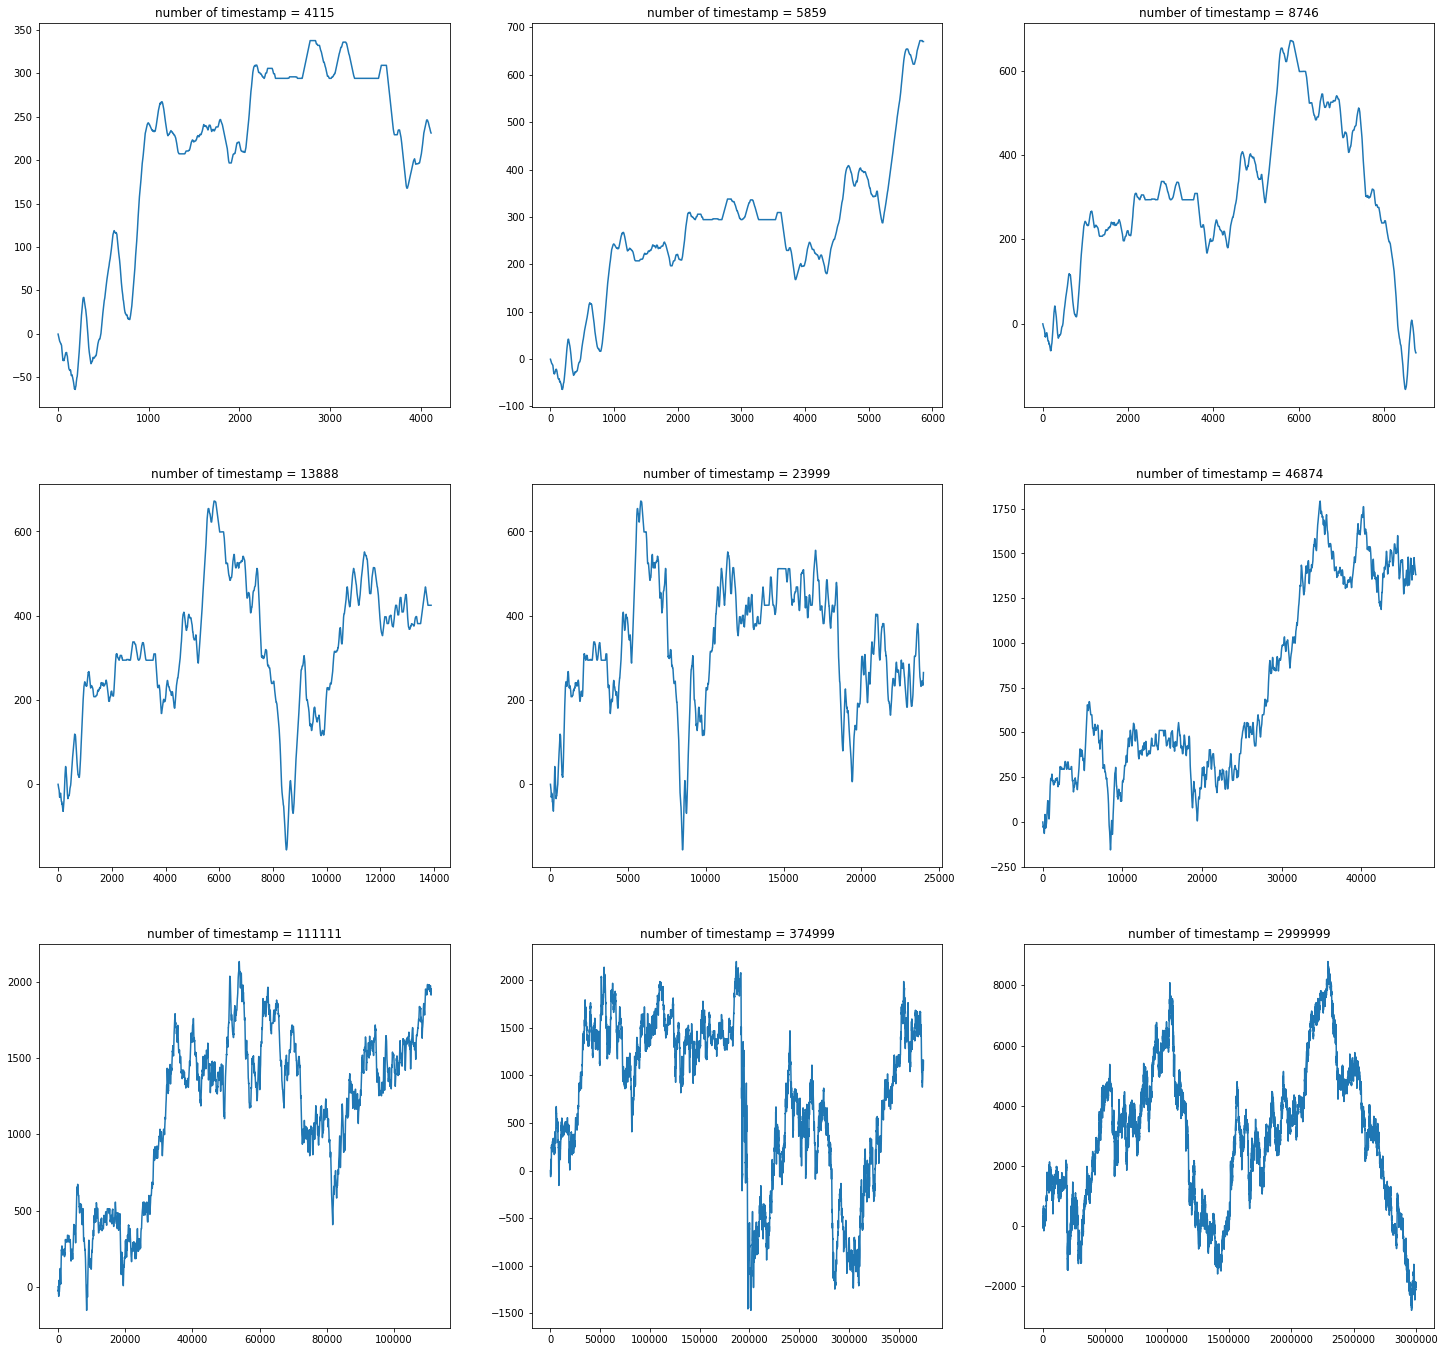

In [31]:
plt.figure(figsize = (25, 24))
for k in range(9):
    wis = df.shape[0] // ((9 - k)**3)
    plt.subplot(3, 3, k+1)
    plt.plot(target[: wis])
    plt.title('number of timestamp = %s'%wis)

### 3.2. For the features `askRate`

That is the first 15 features in our dataset! 

So, we must focus on the outliers by using boxplot, hence the outliers is not in the IQR which defined by 

                    IQR = Q3 (75% quantile) - Q1 (25% quantile)

(<matplotlib.axes._subplots.AxesSubplot at 0x1885b847948>,
 Text(0.5, 1.0, 'fillna = 0'))

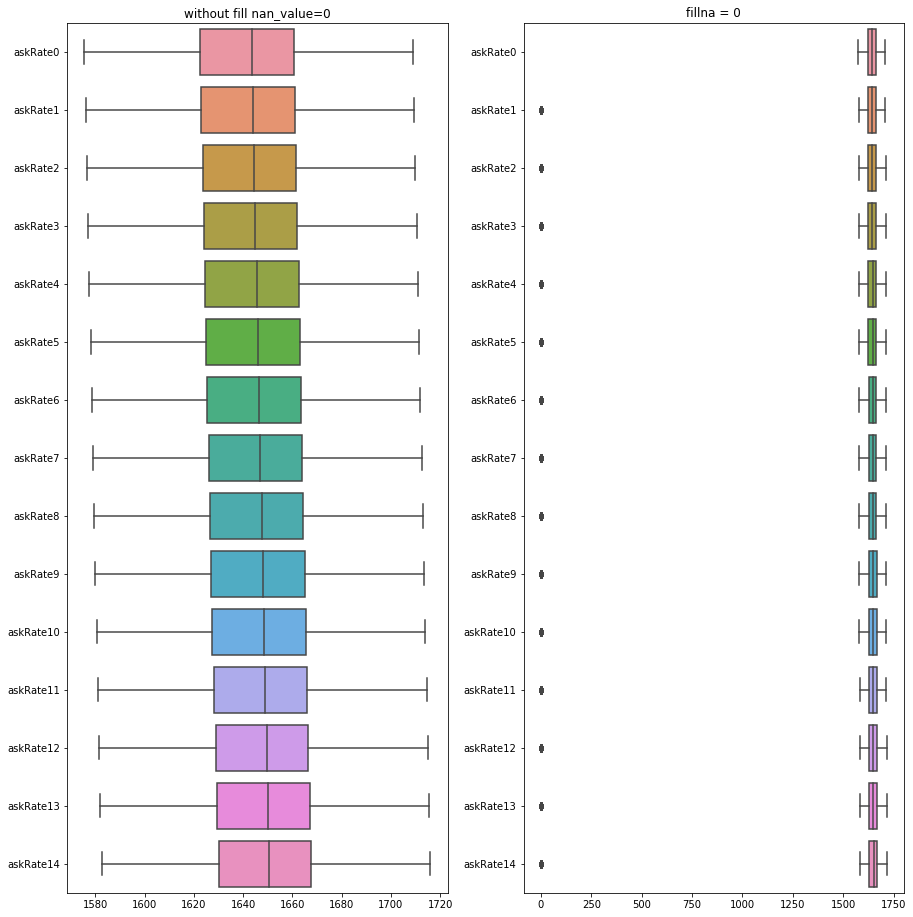

In [12]:
plt.subplots(1, 2, figsize = (15, 16))
plt.subplot(121); sns.boxplot(data = df.iloc[:, :15], orient = 'h'), plt.title('without fill nan_value=0')
plt.subplot(122); sns.boxplot(data = features.iloc[:, :15], orient = 'h'), plt.title('fillna = 0');

Obviously, without using `fillna = 0`, all features in the `askRate` doesn't get the `outliers`

### 3.3. For the next 15 features; group `askSize`

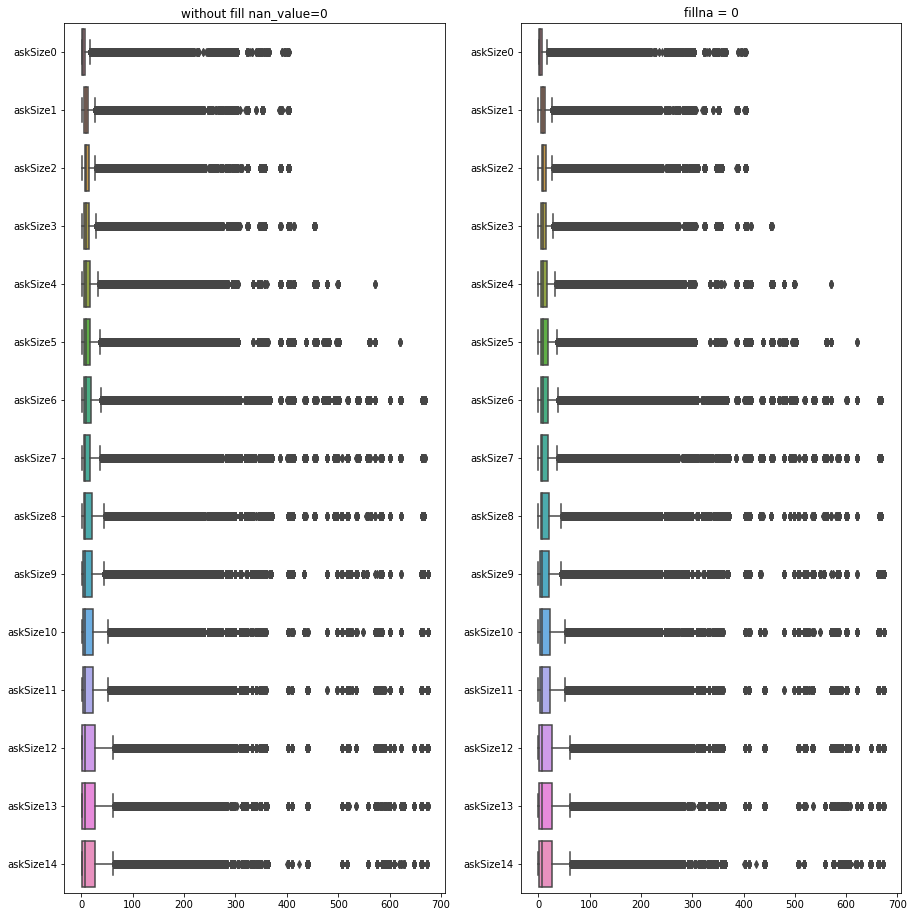

In [21]:
plt.subplots(1, 2, figsize = (15, 16))
plt.subplot(121); sns.boxplot(data = df.iloc[:, 15:30], orient = 'h'), plt.title('without fill nan_value=0')
plt.subplot(122); sns.boxplot(data = features.iloc[:, 15:30], orient = 'h'), plt.title('fillna = 0');

Almost 15 features of `askSize` has the outliers in the interval (40, 700)!!

### 3.4. The group `bidRate`

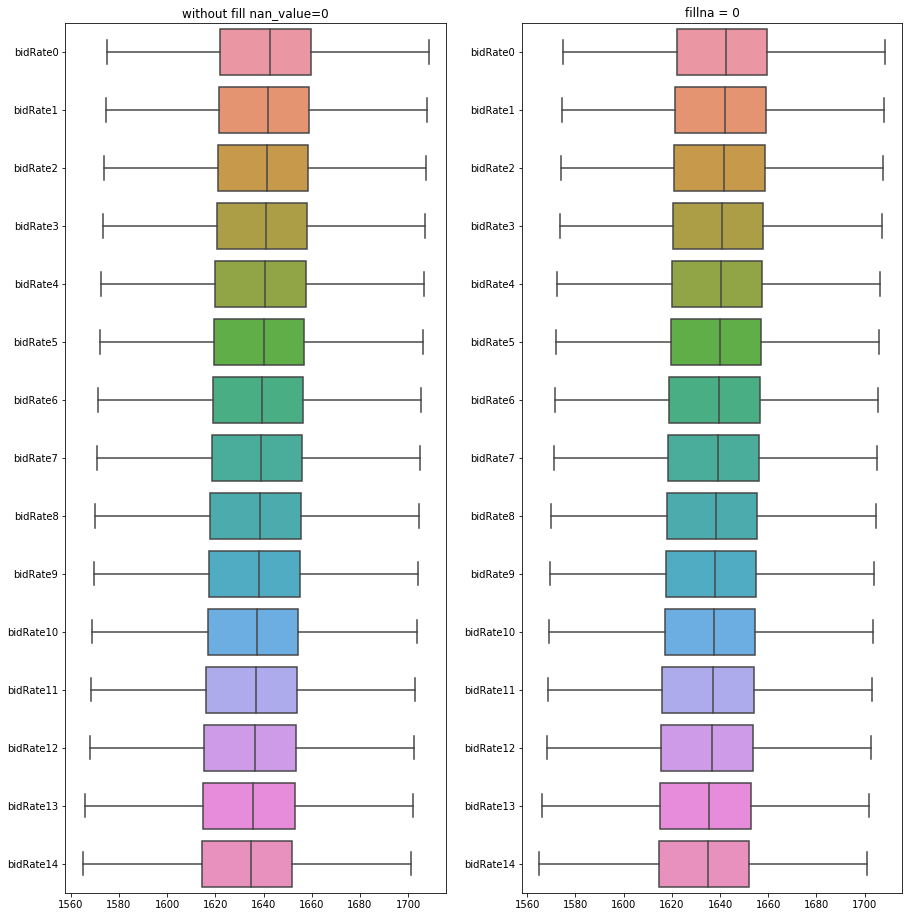

In [22]:
plt.subplots(1, 2, figsize = (15, 16))
plt.subplot(121); sns.boxplot(data = df.iloc[:, 30: 45], orient = 'h'), plt.title('without fill nan_value=0')
plt.subplot(122); sns.boxplot(data = features.iloc[:, 30: 45], orient = 'h'), plt.title('fillna = 0');

Nicely, all of these features doesn't has any outliers!

### 3.5. And for the group `askSize`

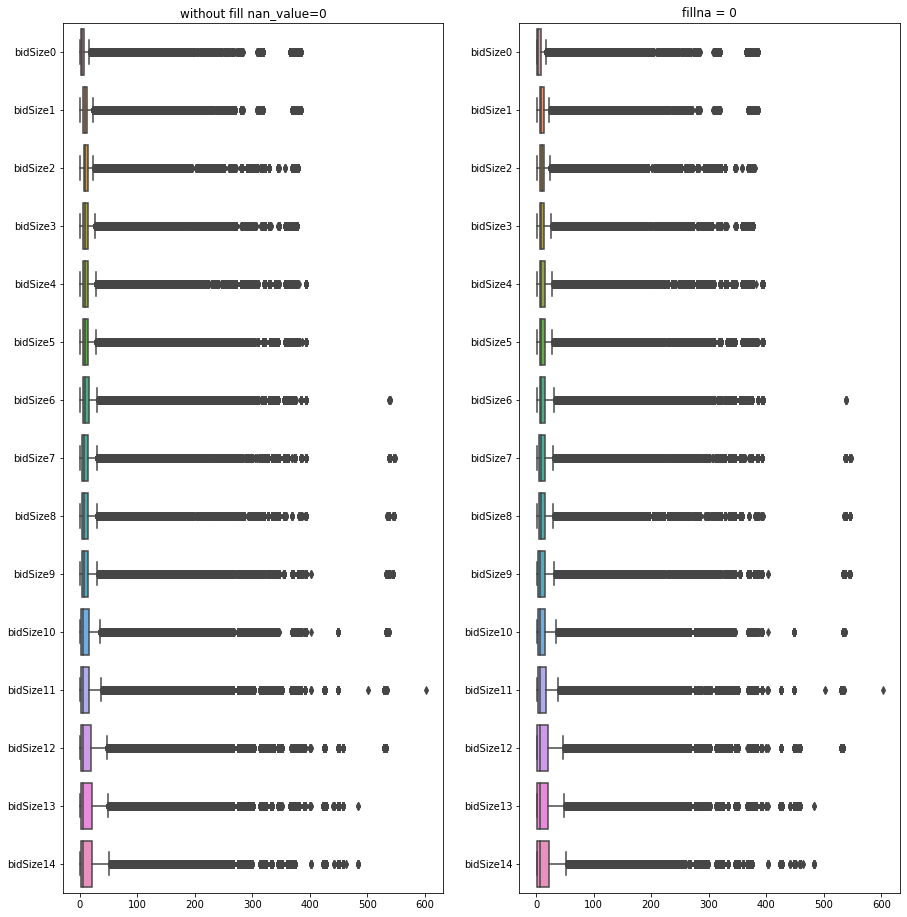

In [23]:
plt.subplots(1, 2, figsize = (15, 16))
plt.subplot(121); sns.boxplot(data = df.iloc[:, 45: 60], orient = 'h'), plt.title('without fill nan_value=0')
plt.subplot(122); sns.boxplot(data = features.iloc[:, 45: ], orient = 'h'), plt.title('fillna = 0');

The range of the outliers in this group is about 40 to 610, which be lower than in the group `askSize`